In [ ]:
#Importaciones
import sys
import os
import json  
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import numpy as np
import tensorflow as tf
from utils import data_loader
from models.baseline import model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [ ]:
# Depuración de los datos cargados

# Ruta a la carpeta que contiene subcarpetas con datos de gestos
DATA_PATH = "../data/processed"

# Verificar si la ruta existe
#if not os.path.exists(DATA_PATH):
#    raise FileNotFoundError(f"La ruta especificada no existe: {DATA_PATH}")

# Mostrar las subcarpetas encontradas
#gesture_folders = [os.path.join(DATA_PATH, d) for d in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, d))]
#if not gesture_folders:
#    raise ValueError(f"No se encontraron subcarpetas en la ruta especificada: {DATA_PATH}")

#print(f"Subcarpetas encontradas: {gesture_folders}")

# Longitud máxima de las secuencias
SEQUENCE_LENGTH = 30

# Depuración: Verificar los archivos JSON en cada subcarpeta

#for folder in gesture_folders:
#    json_files = [f for f in os.listdir(folder) if f.endswith('.json')]
#    print(f"Archivos JSON en {folder}: {json_files}")
#    for json_file in json_files:
#        file_path = os.path.join(folder, json_file)
#        with open(file_path, 'r') as f:
#            data = json.load(f)
#            if not data.get('frames'):
#                print(f"Advertencia: El archivo {file_path} no contiene frames.")
#            else:
#                print(f"El archivo {file_path} contiene {len(data['frames'])} frames.")


# Cargar los datos
X_train, X_test, y_train, y_test = data_loader.load_gesture_data(DATA_PATH, max_len=SEQUENCE_LENGTH)

# Verificar si los datos se cargaron correctamente
if X_train is None or y_train is None or X_test is None or y_test is None:
    raise ValueError("Los datos no se cargaron correctamente. Verifica la estructura de las carpetas y los archivos JSON.")

# Mostrar las formas de los datos cargados
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)

Loading data from: ../data/processed
Found subdirectories: ['../data/processed\\mano_abierta', '../data/processed\\pulgar', '../data/processed\\v']
Found 16 json files in ../data/processed\mano_abierta
Frame 0 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 1 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 2 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 3 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 4 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 5 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 6 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 8 in ../data/processed\mano_abierta\mano_abierta_01.json does not contain landmarks.
Frame 96 in ../data/processed\mano_abierta\mano_abierta_01.json does n

In [ ]:
#Construir y Entrenar el Modelo

NUM_CLASSES = len(data_loader.GESTURE_MAP)

# Verifica que X_train tenga la forma adecuada
input_shape = (X_train.shape[1], X_train.shape[2])

# Construir el modelo
lstm_model = model.build_lstm_model(input_shape, NUM_CLASSES)
lstm_model.summary()

# Entrenar el modelo
history = lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,019 (554.76 KB)

 Trainable params: 142,019 (554.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.3866 - loss: 1.0886 - val_accuracy: 0.5000 - val_loss: 1.0781
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.3866 - loss: 1.0886 - val_accuracy: 0.5000 - val_loss: 1.0781
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5771 - loss: 1.0751 - val_accuracy: 0.7000 - val_loss: 1.0675
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5771 - loss: 1.0751 - val_accuracy: 0.7000 - val_loss: 1.0675
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6582 - loss: 1.0547 - val_accuracy: 0.5000 - val_loss: 1.0410
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6582 - loss: 1.0547 - val_accuracy: 0.5000 - val_loss: 1.0410
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7555 - loss: 1.0142 - val_accuracy: 0.5000 - val_loss: 0.9968
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7555 - loss: 1.0142 - val_accuracy: 0.5000 - val_loss: 0.996

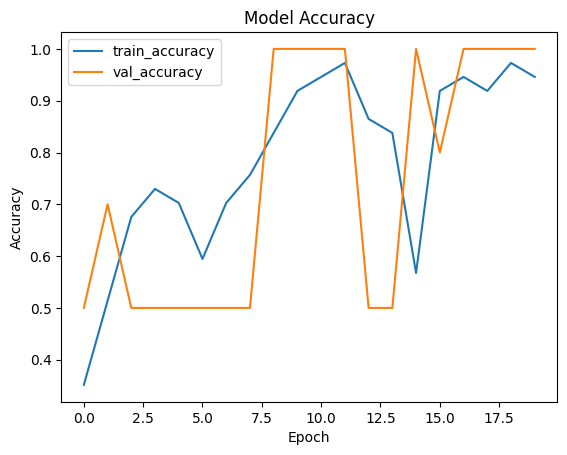

In [4]:
# Graficar la pérdida y la precisión del entrenamiento
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step

Reporte de Clasificación:
              precision    recall  f1-score   support

mano_abierta       1.00      1.00      1.00         2
      pulgar       1.00      1.00      1.00         5
           v       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Matriz de Confusión:

Reporte de Clasificación:
              precision    recall  f1-score   support

mano_abierta       1.00      1.00      1.00         2
      pulgar       1.00      1.00      1.00         5
           v       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Matriz de Confusión:


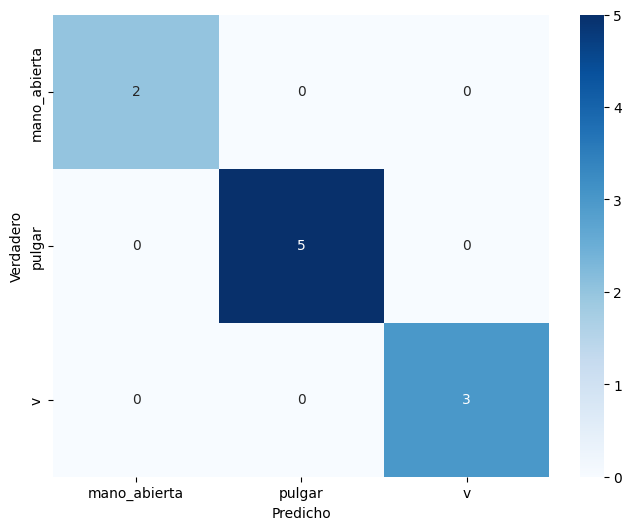

In [5]:
#Reporte de Clasificación y Matriz de Confusión
y_pred = np.argmax(lstm_model.predict(X_test), axis=1)
# Convertir y_test de one-hot a etiquetas de clase si es necesario
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test
gesture_names = list(data_loader.GESTURE_MAP.keys())
labels = list(range(len(gesture_names)))

print("\nReporte de Clasificación:")
print(classification_report(y_test_labels, y_pred, labels=labels, target_names=gesture_names, zero_division=0))

print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test_labels, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=gesture_names, yticklabels=gesture_names, cmap='Blues')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()